In [92]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [198]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

### Lets start off with some data exploration. We have variables: 'id', 'day', 'pressure', 'maxtemp', 'temparature', 'mintemp',
       'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed'

*Day*: Could be 1 = 1/1?\
*Pressure*: air pressure in millibars. Standard sea level pressure is around 1013.2\
*Maxtemp*: Max daily temperature in celcius\
*Temperature*: Avg temp in celcius\
*mintemp*: min temp in celcius\
*dewpoint*: temp in Celcius in which air can hold no more moisture. Dewpoint can never be higher than temperature. I guess hot air can hold more moisture than cold air, so when hot air then decreases to dewpoint, humidity is 100%. Closer temp is to dewpoint, hte more likelihood it precipitates\
*Humidity*: see above\
*cloud*: % cloud coverage?\
*sunshine*: hours? UV index?\
*wind direction*:cardinal directions? but max is 300?
*windspeed*: 

<!-- ### rainfall is not evenly disibuted -->

In [216]:
print(f"% of days that rain {train.rainfall.sum() / train.shape[0]:.4f}")

% of days that rain 0.7534


In [200]:
train.columns

Index(['id', 'day', 'pressure', 'maxtemp', 'temparature', 'mintemp',
       'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection',
       'windspeed', 'rainfall'],
      dtype='object')

In [201]:
train.corr()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
id,1.000000,0.153065,-0.008235,0.012590,0.014307,0.018708,0.006797,-0.029042,0.002226,-0.003022,-0.004223,0.020167,0.033674
day,0.153065,1.000000,0.005337,0.146294,0.153590,0.161475,0.137929,-0.074048,-0.048175,0.060936,0.024800,-0.000199,-0.000462
pressure,-0.008235,0.005337,1.000000,-0.800499,-0.816531,-0.814453,-0.817008,-0.119949,0.098600,-0.257163,-0.643293,0.266012,-0.049886
maxtemp,0.012590,0.146294,-0.800499,1.000000,0.982932,0.965529,0.906703,-0.072615,-0.289047,0.452387,0.662235,-0.354168,-0.079304
temparature,0.014307,0.153590,-0.816531,0.982932,1.000000,0.987150,0.933617,-0.025016,-0.249355,0.414019,0.668963,-0.342262,-0.049660
mintemp,0.018708,0.161475,-0.814453,0.965529,0.987150,1.000000,0.941342,0.009891,-0.219399,0.379497,0.663828,-0.328871,-0.026841
dewpoint,0.006797,0.137929,-0.817008,0.906703,0.933617,0.941342,1.000000,0.153390,-0.088446,0.249676,0.643073,-0.312179,0.081965
humidity,-0.029042,-0.074048,-0.119949,-0.072615,-0.025016,0.009891,0.153390,1.000000,0.584854,-0.541592,-0.012430,0.062285,0.454213
cloud,0.002226,-0.048175,0.098600,-0.289047,-0.249355,-0.219399,-0.088446,0.584854,1.000000,-0.805128,-0.127087,0.184698,0.641191
sunshine,-0.003022,0.060936,-0.257163,0.452387,0.414019,0.379497,0.249676,-0.541592,-0.805128,1.000000,0.272235,-0.241752,-0.555287


In [212]:
train['dewpoint_delta'] = train['temparature'] - train['dewpoint']

In [211]:
train.corr()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall,dewpoint_delta
id,1.000000,0.153065,-0.008235,0.012590,0.014307,0.018708,0.006797,-0.029042,0.002226,-0.003022,-0.004223,0.020167,0.033674,0.014744
day,0.153065,1.000000,0.005337,0.146294,0.153590,0.161475,0.137929,-0.074048,-0.048175,0.060936,0.024800,-0.000199,-0.000462,0.040904
pressure,-0.008235,0.005337,1.000000,-0.800499,-0.816531,-0.814453,-0.817008,-0.119949,0.098600,-0.257163,-0.643293,0.266012,-0.049886,-0.086021
maxtemp,0.012590,0.146294,-0.800499,1.000000,0.982932,0.965529,0.906703,-0.072615,-0.289047,0.452387,0.662235,-0.354168,-0.079304,0.359503
temparature,0.014307,0.153590,-0.816531,0.982932,1.000000,0.987150,0.933617,-0.025016,-0.249355,0.414019,0.668963,-0.342262,-0.049660,0.259579
mintemp,0.018708,0.161475,-0.814453,0.965529,0.987150,1.000000,0.941342,0.009891,-0.219399,0.379497,0.663828,-0.328871,-0.026841,0.201323
dewpoint,0.006797,0.137929,-0.817008,0.906703,0.933617,0.941342,1.000000,0.153390,-0.088446,0.249676,0.643073,-0.312179,0.081965,-0.067611
humidity,-0.029042,-0.074048,-0.119949,-0.072615,-0.025016,0.009891,0.153390,1.000000,0.584854,-0.541592,-0.012430,0.062285,0.454213,-0.511139
cloud,0.002226,-0.048175,0.098600,-0.289047,-0.249355,-0.219399,-0.088446,0.584854,1.000000,-0.805128,-0.127087,0.184698,0.641191,-0.488067
sunshine,-0.003022,0.060936,-0.257163,0.452387,0.414019,0.379497,0.249676,-0.541592,-0.805128,1.000000,0.272235,-0.241752,-0.555287,0.517742


In [97]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train.iloc[:,:-1])
pca = PCA(n_components=train.shape[1]-1)  # Specify the number of components to retain
pca.fit(scaled_data)


PCA(n_components=12)

In [98]:
train.shape

(2190, 13)

In [99]:
transformed_dta = pca.transform(scaled_data)

In [100]:
pca.explained_variance_ratio_

array([0.46028023, 0.18196277, 0.09730811, 0.07210655, 0.07070662,
       0.04130744, 0.03374422, 0.01902999, 0.0148148 , 0.00574853,
       0.00230984, 0.00068092])

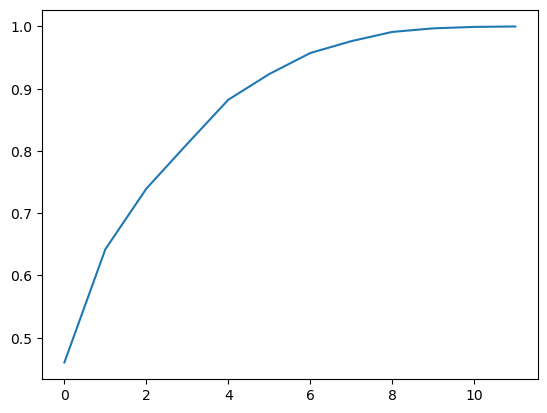

In [101]:
plt.plot((pca.explained_variance_ratio_.cumsum()))

In [103]:
scaled_data.shape

(2190, 12)

In [182]:
#column 1 is id, last is rainfall

#get train test split for train_data, 0.8 and 0.2 split
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(train, test_size=0.2)

X_train = train_data.iloc[:,1:-1]
y_train = train_data['rainfall']
X_test = test_data.iloc[:,1:-1]
y_test = test_data['rainfall']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

base_log_scale = LogisticRegression()
base_log_scale.fit(scaled_data, y_train)
train_score = base_log_scale.score(scaled_data, y_train)
test_score = base_log_scale.score(X_test_scaled, y_test)
#get f1 score for base_log 
from sklearn.metrics import f1_score
y_pred_train = base_log_scale.predict(scaled_data)
y_pred_test = base_log_scale.predict(X_test_scaled)
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

#print train and test score
print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")
print(f"F1 Train Score: {f1_train}")
print(f"F1 Test Score: {f1_test}")

Train Score: 0.8641552511415526
Test Score: 0.865296803652968
F1 Train Score: 0.9118518518518519
F1 Test Score: 0.9146164978292329


In [197]:
# No scaling
base_log = LogisticRegression(max_iter = 500)
base_log.fit(X_train, y_train)

train_score = base_log.score(X_train, y_train)
test_score = base_log.score(X_test, y_test)
#print train and test score
print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")

Train Score: 0.865296803652968
Test Score: 0.865296803652968


Translated into statsmodels

In [223]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, f1_score

# Suppose X_train, X_test, y_train, y_test are already defined.
# 1. Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Add a constant column to X for the intercept (statsmodels requires this explicitly)
X_train_scaled_const = sm.add_constant(X_train_scaled)
X_test_scaled_const = sm.add_constant(X_test_scaled, has_constant='add')

# 3. Fit the logistic model with statsmodels
logit_model = sm.Logit(y_train, X_train_scaled_const)
result = logit_model.fit()  # This will do the numerical optimization

# 4. Check model summary (coefficients, p-values, etc.)
print(result.summary())

# 5. Get predictions (these will be probabilities)
y_pred_train_prob = result.predict(X_train_scaled_const)
y_pred_test_prob  = result.predict(X_test_scaled_const)

# 6. Convert probabilities to binary predictions at a threshold (e.g., 0.5)
y_pred_train = (y_pred_train_prob >= 0.5).astype(int)
y_pred_test  = (y_pred_test_prob >= 0.5).astype(int)

# 7. Evaluate accuracy and F1
train_score = accuracy_score(y_train, y_pred_train)
test_score  = accuracy_score(y_test, y_pred_test)
f1_train    = f1_score(y_train, y_pred_train)
f1_test     = f1_score(y_test, y_pred_test)

print(f"Train Accuracy: {train_score:.4f}")
print(f"Test Accuracy:  {test_score:.4f}")
print(f"F1 Train Score: {f1_train:.4f}")
print(f"F1 Test Score:  {f1_test:.4f}")

Optimization terminated successfully.
         Current function value: 0.327483
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               rainfall   No. Observations:                 1752
Model:                          Logit   Df Residuals:                     1740
Method:                           MLE   Df Model:                           11
Date:                Mon, 17 Mar 2025   Pseudo R-squ.:                  0.4202
Time:                        16:32:49   Log-Likelihood:                -573.75
converged:                       True   LL-Null:                       -989.58
Covariance Type:            nonrobust   LLR p-value:                3.007e-171
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6174      0.088     18.412      0.000       1.445       1.790
x1             0.0877      0.

In [224]:
train.columns

Index(['id', 'day', 'pressure', 'maxtemp', 'temparature', 'mintemp',
       'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection',
       'windspeed', 'rainfall', 'dewpoint_delta'],
      dtype='object')

# Below is submission data

In [190]:
X_sub = test.iloc[:,1:]

na_fill = test['winddirection'].median()
test_na_fill = X_sub.fillna(value = na_fill)
X_sub = scaler.transform(test_na_fill)

submission = base_log_scale.predict(X_sub)

#convert test['id'] to numpy array and join with submission
submission = pd.DataFrame(np.column_stack((test['id'].values, submission)))
submission.columns = ['id', 'rainfall']

In [191]:
submission.to_csv('submission.csv', index=False)

In [194]:
submission.head(10)

,id,rainfall
0,2190,1
1,2191,1
2,2192,1
3,2193,0
4,2194,0
5,2195,1
6,2196,1
7,2197,1
8,2198,1
9,2199,1
